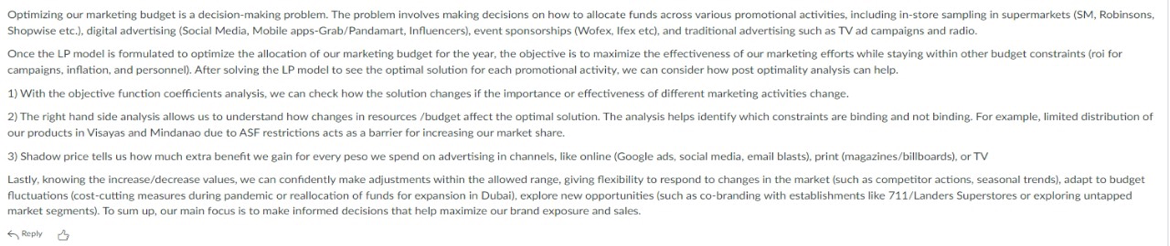
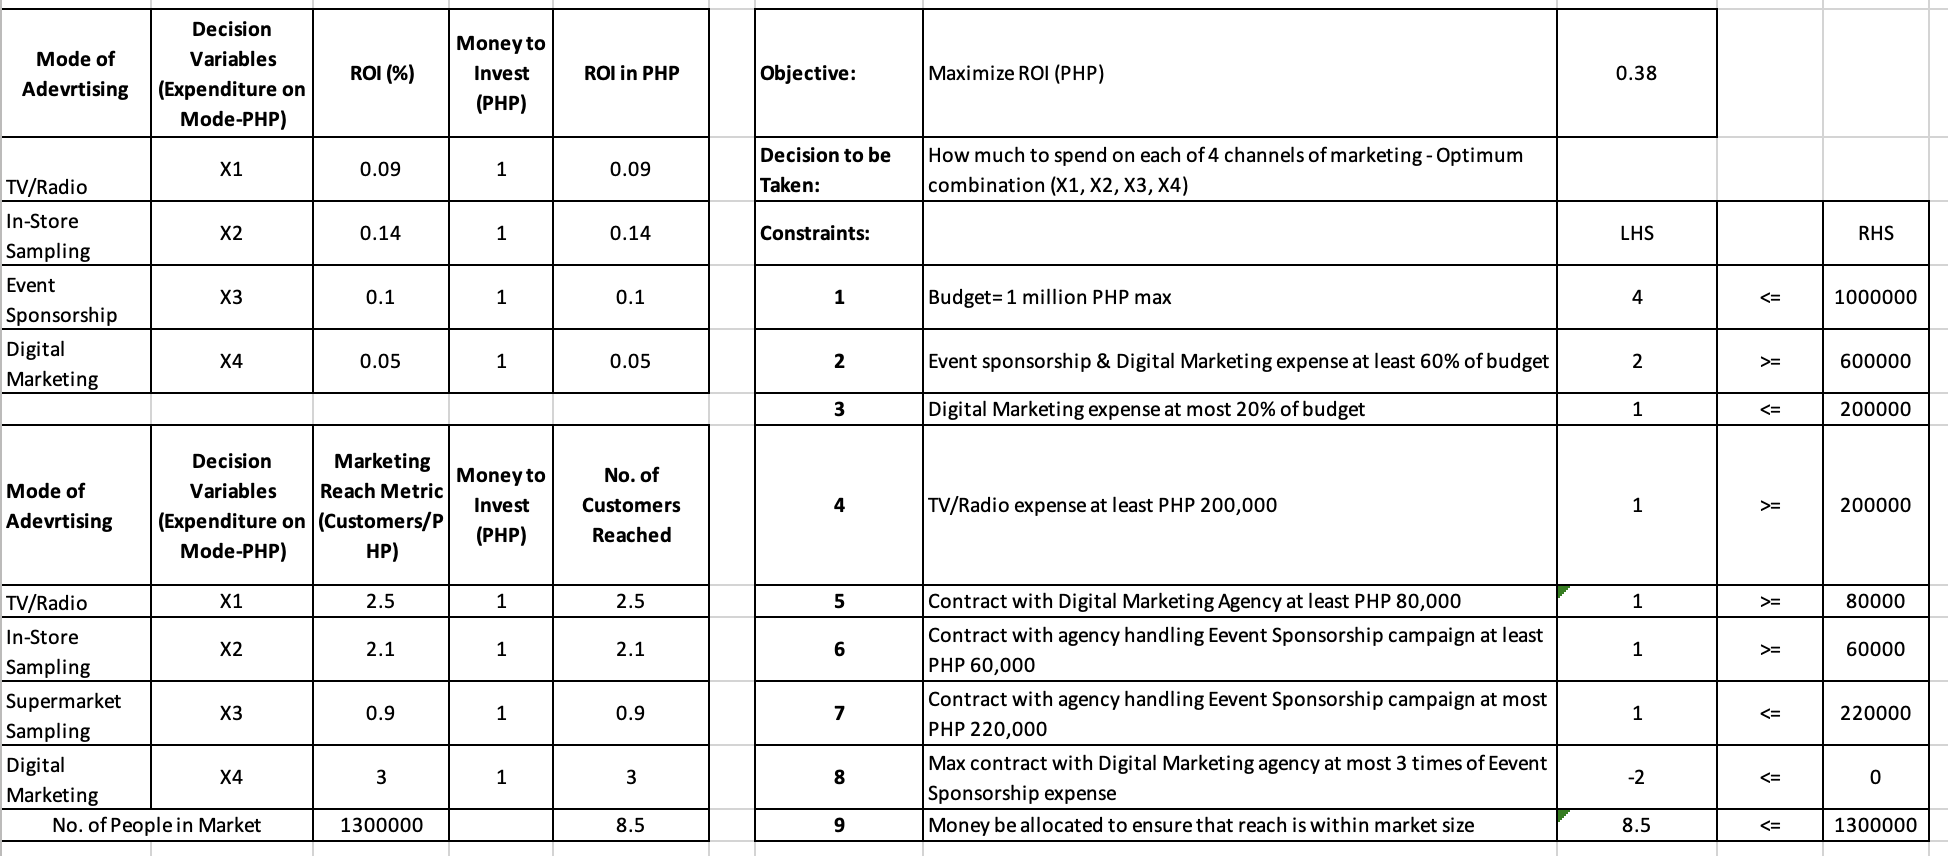

In [3]:
from pulp import *
import pandas as pd

In [105]:
# Initialize the LP
model = LpProblem("Maximize ROI", LpMaximize)

# Decision variables
x1 = LpVariable('TV/Radio', lowBound=0, cat='Continuous')
x2 = LpVariable('In-Store Sampling', lowBound=0, cat='Continuous')
x3 = LpVariable('Event Sponsorship', lowBound=0, cat='Continuous')
x4 = LpVariable('Digital Marketing', lowBound=0, cat='Continuous')

# Define objective function
model += .09 * x1 + .14 * x2 + .1 * x3 + .05 * x4, "Maximize ROI"

# Define constraints
investment = 25000000 # PHP
model += x1 + x2 + x3 + x4 <=  investment, "Maximum investment budget"
model += x3 + x4 >= .6 * investment, "Event Sponsorship and Digital Marketing budget"
model += x4 <= .2 *  investment, "Digital Marketing  budget"
model += x2 >= 500000, "In-Store Sampling expense minimum"
model += x1 >= 200000, "TV Radio expense minimum"
model += x4 >= 80000, "Min Contract with Digital Marketing Agency"
model += x3 >= 60000, "Min Contract with Event Sponsorship Agency"
model += x3 <= .7 * investment, "Max Contract with Event Sponsorship Agency"
model += x4 <= 3 * x3, "Max Contract with Digital Marketing Agency"

# Add constraint for reaching the market size
people = 20000000 # Amount of people in targetted location(s)
model += 2.5 * x1 + 2.1 * x2 + 0.9 * x3 + 3.0 * x4 <= people, "Market size constraint"

print(model)

# Solve the problem
model.solve()

# Print the status of the solution
print("Status:", LpStatus[model.status])

# Print the optimal values of decision variables
print("Optimal values:")
for v in model.variables():
    print(f"{v.name} = {round(v.varValue, 2)} PHP")

# Print the optimal objective value
print(f"Optimal ROI: {round(value(model.objective), 2)} PHP")

Maximize_ROI:
MAXIMIZE
0.05*Digital_Marketing + 0.1*Event_Sponsorship + 0.14*In_Store_Sampling + 0.09*TV_Radio + 0.0
SUBJECT TO
Maximum_investment_budget: Digital_Marketing + Event_Sponsorship
 + In_Store_Sampling + TV_Radio <= 25000000

Event_Sponsorship_and_Digital_Marketing_budget: Digital_Marketing
 + Event_Sponsorship >= 15000000

Digital_Marketing__budget: Digital_Marketing <= 5000000

In_Store_Sampling_expense_minimum: In_Store_Sampling >= 500000

TV_Radio_expense_minimum: TV_Radio >= 200000

Min_Contract_with_Digital_Marketing_Agency: Digital_Marketing >= 80000

Min_Contract_with_Event_Sponsorship_Agency: Event_Sponsorship >= 60000

Max_Contract_with_Event_Sponsorship_Agency: Event_Sponsorship <= 17500000

Max_Contract_with_Digital_Marketing_Agency: Digital_Marketing
 - 3 Event_Sponsorship <= 0

Market_size_constraint: 3 Digital_Marketing + 0.9 Event_Sponsorship
 + 2.1 In_Store_Sampling + 2.5 TV_Radio <= 20000000

VARIABLES
Digital_Marketing Continuous
Event_Sponsorship Continu

/Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
